In [65]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv("../ks-projects-201801/ks-projects-201801.csv")

In [20]:
df = df.drop(df.index[10000:])

In [21]:
df1 = pd.get_dummies(df['state'])
df2 = pd.merge(df, df1, left_index=True, right_index=True)

In [22]:
df2.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,canceled,failed,live,successful,suspended,undefined
count,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.898000e+03,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,9.333645e+08,3.932786e+04,1.126714e+04,110.666500,7.722740e+03,1.050871e+04,3.233731e+04,0.100600,0.520400,0.00830,0.356500,0.004600,0.009600
std,2.789635e+08,5.333448e+05,1.300826e+05,960.793867,1.057760e+05,1.266181e+05,3.323909e+05,0.300813,0.499609,0.09073,0.478989,0.067671,0.097513
min,1.003381e+06,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,9.100000e-01,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.008698e+09,2.000000e+03,3.300000e+01,2.000000,2.000000e+01,3.300000e+01,2.000000e+03,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.022847e+09,5.000000e+03,6.500000e+02,12.000000,4.210000e+02,6.494450e+02,5.250000e+03,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
75%,1.036712e+09,1.750000e+04,4.233000e+03,56.000000,3.105000e+03,4.176000e+03,1.619526e+04,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000
max,1.050360e+09,4.000000e+07,8.596475e+06,63416.000000,8.596475e+06,8.596475e+06,2.000000e+07,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [23]:
df2 = df2.drop("canceled", axis=1)
df2 = df2.drop("failed", axis=1)
df2 = df2.drop("live",  axis=1)
df2 = df2.drop("suspended",  axis=1)
df2 = df2.drop("undefined",  axis=1)
df2 = df2.drop("name", axis=1)
df2 = df2.drop("category", axis=1)
df2 = df2.drop("main_category", axis=1)
df2 = df2.drop("currency", axis=1)
df2 = df2.drop("deadline", axis=1)
df2 = df2.drop("launched", axis=1)
df2 = df2.drop("state", axis=1)
df2 = df2.drop("country", axis=1)

In [24]:
df2.head(3)

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,successful
0,1000002330,1000.0,0.0,0,0.0,0.0,1533.95,0
1,1000003930,30000.0,2421.0,15,100.0,2421.0,30000.00,0
2,1000004038,45000.0,220.0,3,220.0,220.0,45000.00,0


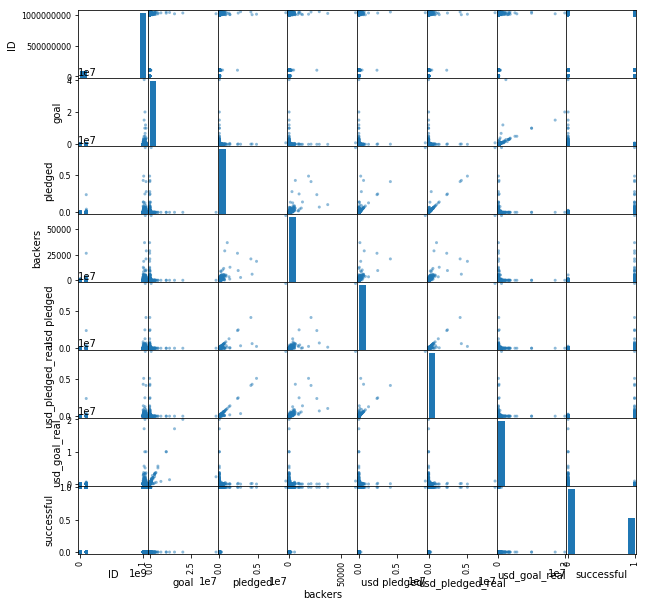

In [25]:
pd.plotting.scatter_matrix(df2, figsize=(10,10))
plt.show()

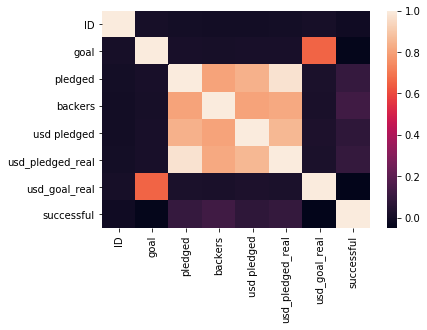

In [26]:
sns.heatmap(df2.corr())
plt.show()

In [68]:
# ロジスティック回帰
y = df2["successful"].values
X = df2[["backers"]].values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=10000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
# ラベルを予測
y_pred = clf.predict(X)

# 正答率を計算
accuracy =  accuracy_score(y, y_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 78.820%
適合率（Precision） = 77.292%
再現率（Recall） = 94.996%
F1値（F1-score） = 85.234%


訓練誤差　MAE = 0.451
汎化誤差　MAE = 0.456


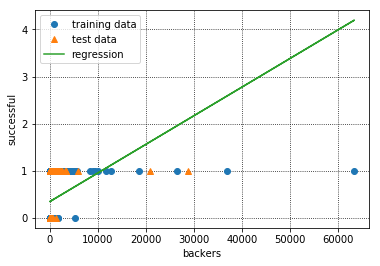

In [52]:
x = df2[["backers"]].values
X = x.reshape(-1,1) # scikit-learnに入力するために整形
test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）

# 学習用データを使って線形回帰モデルを学習
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)

# 学習用データに対する予測を実行
y_pred_train = regr.predict(X_train)

# 学習データに対するMAEを計算（訓練誤差の評価）
mae = mean_absolute_error(y_train, y_pred_train)
print("訓練誤差　MAE = %s"%round(mae,3) )

# テストデータに対する予測を実行
y_pred_test = regr.predict(X_test)

# テストデータに対するMAEを計算（汎化誤差の評価）
mae = mean_absolute_error(y_test, y_pred_test)
print("汎化誤差　MAE = %s"%round(mae,3) )

# グラフに重ねて表示する
plt.plot(X_train, y_train, 'o', label='training data')
plt.plot(X_test, y_test, '^', label='test data')
plt.ylabel("successful")
plt.xlabel("backers")
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(X_train, y_pred_train, label='regression')
plt.legend(loc='best')
plt.show()


In [53]:
x = df2[["backers"]].values
X = x.reshape(-1,1) # scikit-learnに入力するために整形
n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
    # 学習用データを使って線形回帰モデルを学習
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train, y_train)

    # テストデータに対する予測を実行
    y_pred_test = regr.predict(X_test)
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(y_test, y_pred_test)
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print()
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))

Fold 1
MAE = 0.456

Fold 2
MAE = 0.453

Fold 3
MAE = 0.451

Fold 4
MAE = 0.45

Fold 5
MAE = 0.454

Cross Validation MAE = 0.453


In [55]:
df3 = df2.drop(df2.index[100:])

In [56]:
df3.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,successful
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,9.272811e+08,19796.710000,9134.102600,125.130000,7754.993100,9354.592000,19726.169400,0.420000
std,2.486553e+08,37117.042835,20203.825442,325.564022,17766.627521,21418.768917,37012.836925,0.496045
min,1.000365e+07,100.000000,0.000000,0.000000,0.000000,0.000000,65.550000,0.000000
25%,1.000072e+09,2875.000000,89.500000,3.000000,78.500000,96.575000,2894.837500,0.000000
50%,1.000184e+09,7500.000000,1116.000000,24.500000,771.910000,1116.000000,7608.205000,0.000000
75%,1.000271e+09,15689.250000,8335.085000,96.250000,8176.007500,8335.085000,15857.192500,1.000000
max,1.000399e+09,250000.000000,124998.000000,2784.000000,124998.000000,124998.000000,250000.000000,1.000000


In [71]:
y = df3["successful"].values
X = df3[["backers"]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 標準化
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

# SVMの実行
C = 10
clf = SVC(C=C,kernel="linear")
clf.fit(X_train, y_train)

# 未知のデータを識別する
y_pred = clf.predict(X_test)

D:\tools\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\tools\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\tools\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [73]:
# 正答率を計算
accuracy =  accuracy_score(y_test, y_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)

# カテゴリ「2000万以上」に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))

正答率（Accuracy） = 86.667%
適合率（Precision） = 81.818%
再現率（Recall） = 100.000%
F1値（F1-score） = 90.000%
